# RichValues: a Python library for working with uncertainties

In this tutorial, divided in 3 parts, we will see how to use the library RichValues. It can be useful for working easily with numeric values that have associated uncertainties, and also even upper/lower limits or finite intervals of values.


## Part 1: Quick tutorial for RichValues

Here you can see how to use the library within a Python script or terminal. For more details, please check the [user guide](https://github.com/andresmegias/richvalues/blob/main/userguide.pdf).

First of all, we import the library.

In [1]:
import richvalues as rv

Let's create two rich values.

In [2]:
x = rv.rval('5.2 +/- 0.4')
y = rv.rval('3.1 -0.4+0.5')
x

5.2+/-0.4

If you want to specify a domain, you can write it between brackets, for example: `rv.rval('5.2 +/-0.4 [0,inf]')`. You can access to the properties of rich values; for example: `x.main` would return the main value, `5.2`, and `x.unc` would return the inferior and superior uncertainties, `[0.4, 0.4]`. You can also obtain derived properties, like the relative uncertainty, `x.rel_unc`.

In [3]:
x.main

5.2

Now, we can use mathematical operators to perform calculations with these rich values. For example, `x + y` would yield `8.3 +/- 0.6`.

In [4]:
x+y

8.3+/-0.6

Alternatively, you can use `function`, that allows to apply more complicated functions.
~~~
rv.function('{}+{}', args=[x,y])
~~~
You just have to write the expression that you want to apply, using empty curly brackets instead of the inputs, which have to be specified in the correct order. The function expression can include other functions; for example, if you imported the NumPy library as `np`, you could write: `rv.function('np.sin({}/{})', [x,y])`.

In [5]:
rv.function('np.sin({}/{})', [x,y])

0.983-0.064+0.016

Now, let's see how to create rich arrays (based on NumPy arrays).

In [6]:
u = rv.rarray(['1.2 +/- 0.4', '2.1-0.3+0.4', '5.8 +/-0.9'])
v = rv.rarray(['8 +/- 3', '16+/-4', '< 21'])
u

RichArray([1.2+/-0.4, 2.1-0.3+0.4, 5.8+/-0.9], dtype=object)

The domain can be specified with the `domain` argument. Alternatively, you can create rich arrays from arrays that contain the main values, the uncertainties, and the rest of variables.

In [7]:
mains = [1.2, 2.1, 5.8]
uncs = [[0.4, 0.4], [-0.3, 0.4], [0.9, 0.9]]
u = rv.RichArray(mains, uncs, domains=[0,rv.inf])
u

RichArray([1.2+/-0.4, 2.1-0.3+0.4, 5.8+/-0.9], dtype=object)

As with individual rich values, you can access to different properties; for example, u.mains would return the main values, [8., 21.].

In [8]:
u.mains

array([1.2, 2.1, 5.8])

You can use arithmetic operators as well to perform calculations; for example, `u*v` would yield `[9-4+5, < 150]`.

In [9]:
u*v

RichArray([9-4+5, 33-9+10, < 150], dtype=object)

 Alternatively, you can use `array_function`.

In [10]:
rv.array_function('{}*{}', [u,v], elementwise=True)

RichArray([9-4+5, 34-9+10, < 130], dtype=object)

Lastly, let's see how to create a rich dataframe (based on Pandas dataframes). The easiest way is to convert a dataframe with text strings representing rich values using `rich_dataframe`, but you can also convert dictionaries.

In [11]:
import numpy as np
import pandas as pd
dic = {'a': ['2.1+/-0.3','5'], 'b': ['3.4+/-0.4','<6'], 'c': ['<4','8+/-1']}
rdf = rv.rich_dataframe(dic, domains=[0,np.inf])
rdf

,a,b,c
0,2.1+/-0.3,3.4+/-0.4,< 4
1,5,< 6,8+/-1


You can access to different properties of the values of the rich dataframe; for example, `rdf.mains` would return a regular dataframe containing the main values of the elements of `rdf`.

In [12]:
rdf.mains

,a,b,c
0,2.1,3.4,4.0
1,5.0,6.0,8.0


 Arithmetic operators can be used with rich dataframes, although for more complicated functions you can use `create_column` and `create_row`.

In [13]:
rdf['d'] = rdf.create_column('np.tan({}/{})', ['a','b'])
rdf

,a,b,c,d
0,2.1+/-0.3,3.4+/-0.4,< 4,0.72-0.15+0.21
1,5,< 6,8+/-1,1.2-3.1+1.9


Note that in this case you have to specify the names of the columns involved in the calculation.

That would be it for this quick tutorial. If you want to learn more, you can read the [user guide](https://github.com/andresmegias/richvalues/blob/main/userguide.pdf) and also check and run the [example scripts](https://github.com/andresmegias/richvalues/tree/main/examples) (`ratio.py` and `linearfit.py`).

## Part 2: A real example with dataframes

In this tutorial, we import a file of abundances of two molecules in several astronomical sources, we compute the ratio between both species for each source, make a plot of it and export the results.

First, let's import the modules and libraries to use.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richvalues as rv

Let's import the data.

In [15]:
data = pd.read_csv('observed-column-densities.csv', index_col=0, comment='#')
data = rv.rich_dataframe(data, domains=[0,np.inf])
data

,HC3N,CH3CN
Source \ Molecule,,
L1517B - dust,5.16+/-0.05 e13,2.1+/-0.6 e11
L1517B - methanol,3.72-0.13+0.14 e12,< 2.0 e11
L1498 - dust,1.6+/-0.3 e13,< 8 e10
L1498 - methanol,2.2+/-1.0 e13,1.0+/-0.1 e11
L1544 - dust,1.0+/-0.3 e14,1.5+/-0.2 e11
L1544 - methanol,4.2+/-0.4 e13,< 9 e10
L1521E - dust,8.4+/-2.5 e12,4.8+/-1.4 e11
B1-a,4.2+/-1.2 e12,4.9+/-1.1 e11
B1-c,4+/-3 e12,3.5+/-0.6 e11


We want to compute the ratio between the two columns. It is very easy.

In [16]:
ratio = data['HC3N'] / data['CH3CN']
ratio

Source \ Molecule
L1517B - dust         240-60+100
L1517B - methanol           > 17
L1498 - dust                > 90
L1498 - methanol     220-100+110
L1544 - dust         670-210+230
L1544 - methanol           > 400
L1521E - dust            18-6+10
B1-a                       9-3+4
B1-c                     12+/-10
B5 IRS1                      > 5
HH 300                       nan
IRAS 03235              24-10+31
IRAS 03245              19-15+57
IRAS 03254                   nan
IRAS 03271                9-7+15
IRAS 04108                   nan
IRAS 23238              23-18+21
L1014 IRS                  > 1.4
L1448 IRS1                   nan
L1455 IRS3                 > 1.4
L1455 SMM1                   > 4
L1489 IRS                  > 0.5
SVS 4-5                   21-6+8
GM Aur               8.9-1.9+2.0
As 209                    17-3+4
HD 163296                32-8+11
MWC 480                  23-8+11
46P                       < 0.22
67P                        0.068
dtype: object

We obtained a Pandas' series. Now, we add it to the original dataframe.

In [17]:
data['ratio'] = ratio
data

,HC3N,CH3CN,ratio
Source \ Molecule,,,
L1517B - dust,5.16+/-0.05 e13,2.1+/-0.6 e11,240-60+100
L1517B - methanol,3.72-0.13+0.14 e12,< 2.0 e11,> 17
L1498 - dust,1.6+/-0.3 e13,< 8 e10,> 90
L1498 - methanol,2.2+/-1.0 e13,1.0+/-0.1 e11,220-100+110
L1544 - dust,1.0+/-0.3 e14,1.5+/-0.2 e11,670-210+230
L1544 - methanol,4.2+/-0.4 e13,< 9 e10,> 400
L1521E - dust,8.4+/-2.5 e12,4.8+/-1.4 e11,18-6+10
B1-a,4.2+/-1.2 e12,4.9+/-1.1 e11,9-3+4
B1-c,4+/-3 e12,3.5+/-0.6 e11,12+/-10


We can also export the dataframe easily.

In [31]:
data.to_csv('observed-ratio.csv')

Now, let's make a plot of the calculated ratios.

We put some graphical options.

In [19]:
fontsize = 10.
plt.rcParams['font.size'] = fontsize
colors = np.array(['tab:blue']*7 + ['tab:green']*16 + ['tab:red']*4
                  + ['orchid']*2)
names = data.index.values
diffs = [0, 0.5, 1, 0.5, 1, 0.5, 1,
         1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
locs = []
for diff in diffs:
    locs += [diff]
locs = np.cumsum(locs)
plot_approx_uncs = False

Now, to plot our rich values we can simply use the function `rv.errorbar`, which is an implementation of Matplotlib's `errorbar`.

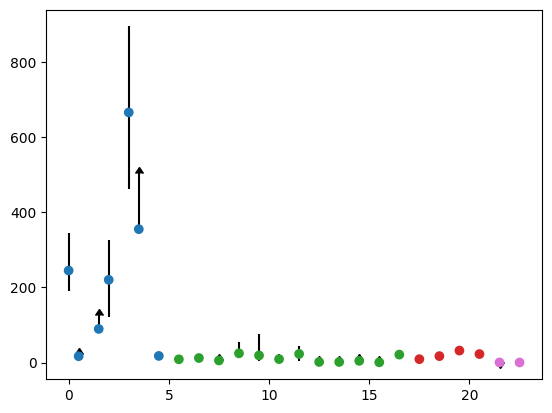

In [20]:
rv.errorbar(locs, ratio, fmt=',', color='black')
plt.scatter(locs, ratio.mains, color=colors, zorder=3)
plt.show()

Now, we complete the plot with more options.

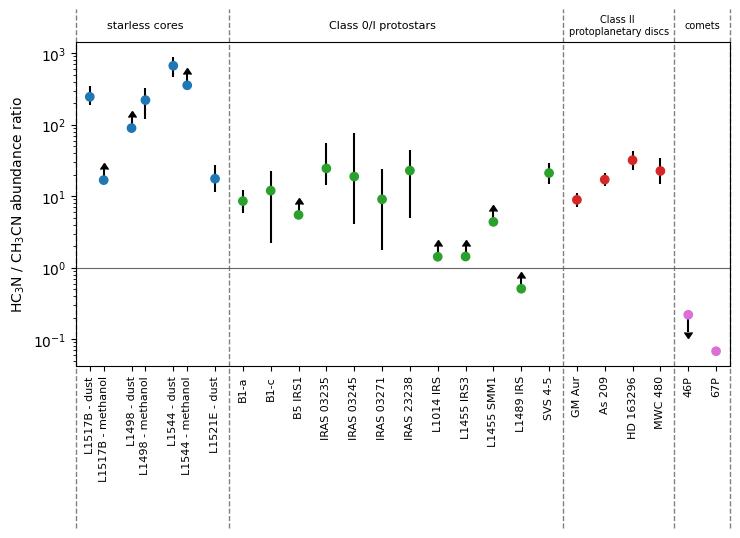

In [21]:
plt.figure(1, figsize=(7.5,5.0))
plt.clf()
rv.errorbar(locs, ratio, fmt=',', color='black')
plt.scatter(locs, ratio.mains, color=colors, zorder=3)
if plot_approx_uncs:
    col_dens_HC3N = rv.rich_array(data['HC3N'])
    col_dens_CH3CN = rv.rich_array(data['CH3CN'])
    ratio_mains = col_dens_HC3N.mains / col_dens_CH3CN.mains
    ratio_uncs_eb = \
        ratio_mains * ((col_dens_HC3N.uncs_eb/col_dens_HC3N.mains)**2
                       +(col_dens_CH3CN.uncs_eb/col_dens_CH3CN.mains)**2)**0.5
    for i in range(len(ratio_mains)):
        if col_dens_CH3CN[i].is_uplim:
            ratio_mains[i] = ((col_dens_HC3N[i].main - 1*col_dens_HC3N[i].unc[0])
                              / col_dens_CH3CN[i].main)
    ratio_mains[-2] = (col_dens_HC3N[-2].main / (col_dens_CH3CN[-2].main
                       - 1*col_dens_CH3CN[-2].unc[0]))
    cond = np.isfinite(ratio.mains)
    locs_ = locs[cond]
    ratio_mains = ratio_mains[cond]
    ratio_uncs_eb = ratio_uncs_eb[:,cond]
    cond = ~ rv.rich_array(ratio[np.isfinite(ratio.mains)]).are_lims
    plt.errorbar(locs_[cond], ratio_mains[cond], yerr=ratio_uncs_eb[:,cond],
                 fmt=',', alpha=0.8, color='orange', zorder=2)
    plt.scatter(locs_, ratio_mains, color='orange', alpha=0.8, zorder=2)
plt.xlim([-0.5, locs[-1] + 0.5])
plt.axhline(y=1, linestyle='-', linewidth=0.8, color=(0.4,0.4,0.4))
plt.yscale('log')
cond = ~ np.isnan(ratio.mains)
plt.xticks(ticks=locs[cond], labels=names[cond], rotation=90,
           fontsize=0.8*fontsize)
plt.ylabel('HC$_3$N / CH$_3$CN abundance ratio')
y_top_labels = 1.05
ax = plt.gca()
xrange = np.diff(plt.xlim())
edges = np.array([0, 7, 23, 27, 29])
text_locs = []
for i in range(len(edges)-1):
    i1 = edges[i]
    i2 = edges[i+1]
    text_locs += [0.5 + np.median(locs[i1:i2])]
texts = ['starless cores', 'Class 0/I protostars',
         'Class II \nprotoplanetary discs', 'comets']
fontsizes = fontsize*np.array([0.8, 0.8, 0.7, 0.7])
for i, text, fs in zip(text_locs, texts, fontsizes):
    plt.text(i/xrange, y_top_labels, text, ha='center', va='center',
             fontsize=fs, transform=ax.transAxes)
line_locs = [locs[0] - 0.5]
line_locs += list(locs[edges[1:-1]] - 0.5)
line_locs += [locs[-1] + 0.5]
for x in line_locs:
    plt.axvline(x, ymin=-0.5, ymax=1.1, linestyle='--', linewidth=1.,
                color='gray', clip_on=False, zorder=0.5)
plt.tight_layout()
plt.show()

That's it! You can change the value of the variable `plot_approx_uncs` in one of the previous cells and re-run the cells of the plot, to see the values that we would obtain using the usual analytical formulas for uncertainty propagation.

The approach of RichValues is more precise.

## Part 3: Making a linear fit

In this tutorial, we make a linear fit of a set of points whith uncertainties and also finite intervals and upper/lower limits.

First, we import the modules and libraries to be used.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richvalues as rv

Let's load the data points.

In [23]:
data = rv.rich_dataframe(pd.read_csv('linear-data.csv'))
data

,x,y
0,< 20,6+/-4
1,2.7+/-1.1,16+/-3
2,3.4+/-1.2,16+/-4
3,4.4+/-0.7,15+/-3
4,8.6+/-0.9,30+/-4
5,8.7+/-1.2,30+/-4
6,10.0+/-0.9,32+/-4
7,11.1+/-1.5,36+/-3
8,11.9+/-0.8,42+/-4
9,13.3+/-0.7,36+/-5


We have 30 set of points $(x,y)$.

Let's plot the values to see how they look.

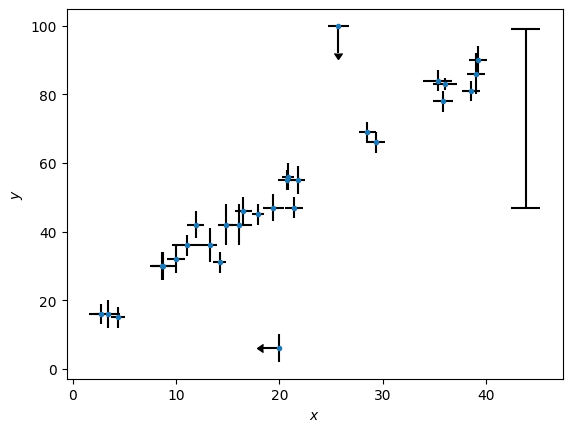

In [24]:
x = rv.rich_array(data['x'].values)
y = rv.rich_array(data['y'].values)
rv.errorbar(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Indeed, it seems that the data follow a linear tren. Let's make a fit to a line, then.

We will use the function `rv.curve_fit`, which uses SciPy's function `minimize`, from its module `optimize`. It uses a bootstrap algorithm.

In [25]:
result = rv.curve_fit(x, y, lambda x,m,b: m*x+b, guess=[2.,10.],
                      consider_arg_intervs=True)

Fitting...
  25 %
  50 %
  75 %
  100 %


That's it! It was easy. Now, we can access to the output of the fit.

In [26]:
slope, offset = result['parameters']
dispersion = result['dispersion']
samples = result['parameters samples']
slope

1.92+/-0.07

Actually, the ground truth is as follows:

In [27]:
slope_true, offset_true = 2, 10
dispersion_x, dispersion_y = 0.6, 3
errorbar_x, errorbar_y = 0.9, 3.6

Let's make a plot showing our fitted line.

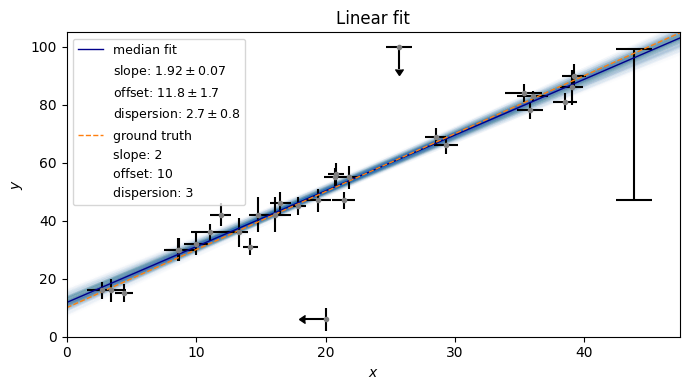

In [28]:
# Some options.
plot_truth = True
color_fit = 'darkblue'
color_samples = 'tab:blue'
color_truth = 'tab:orange'
# Plot of the data and the fit.
plt.figure(1, figsize=(7,4))
plt.clf()
rv.errorbar(x, y, color='gray')
xlims = plt.xlim()
ylims = plt.ylim()
x_ = np.linspace(0, xlims[1], 4)
plt.plot(x_, slope.main * x_ + offset.main, color=color_fit, lw=1,
         label='median fit')
plt.plot([], [], alpha=0, label='slope: {}'.format(slope.latex()))
plt.plot([], [], alpha=0, label='offset: {}'.format(offset.latex()))
plt.plot([], [], alpha=0, label='dispersion: {}'
         .format(dispersion.latex()))
if plot_truth:
    plt.plot(x_, slope_true * x_ + offset_true, color=color_truth,
             label='ground truth', linestyle='--', lw=1)
    plt.plot([], [], alpha=0, label='slope: {}'.format(slope_true))
    plt.plot([], [], alpha=0, label='offset: {}'.format(offset_true))
    plt.plot([], [], alpha=0, label='dispersion: {}'.format(dispersion_y))
num_curves = min(400, samples.shape[0])
inds = np.arange(samples.shape[0])
np.random.shuffle(inds)
for slope_i, offset_i in samples[inds][:num_curves]:
    plt.plot(x_, slope_i * x_ + offset_i, color=color_samples, alpha=0.01,
             zorder=1)
plt.legend(fontsize=9)
plt.title('Linear fit') 
plt.ylim([0, ylims[1]])
plt.xlim([0, xlims[1]])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.show()

Additionally, we can assess the quality of the fit plotting the distributions of the fitted parameters.

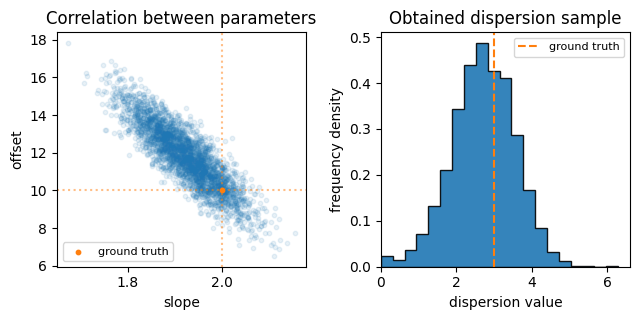

In [29]:
# Some previous calculations with the values used in the fit.
ranges = [samples[:,i].max() - samples[:,i].min() for i in [0,1]]
q1 = 0.02 if max(ranges) > 100. else 0.
q2 = 1 - q1
if q1 > 0:
    x1, x2 = [np.quantile(samples[:,0], qi) for qi in [q1, q2]]
    y1, y2 = [np.quantile(samples[:,1], qi) for qi in [q1, q2]]
    margin = 0.05
    xlims = np.array([min(x1, slope_true), max(x2, slope_true)])
    ylims = np.array([min(y1, offset_true), max(y2, offset_true)])
    xlims += np.array([-1, 1]) * margin * np.diff(xlims)
    ylims += np.array([-1, 1]) * margin * np.diff(ylims)
else:
    xlims, ylims = None, None
# Plot of the distribution of values used in the fit.
plt.figure(2, figsize=(6.5,3.3))
plt.clf()
# Subplot for the correlation between the offset and the slope.
plt.subplot(1,2,1)
plt.scatter(samples[:,0], samples[:,1], color=color_samples,
            s=10, alpha=0.1)
if plot_truth:
    plt.scatter(slope_true, offset_true, color=color_truth, s=10,
                label='ground truth')
    plt.axvline(slope_true, color=color_truth, lw=1.5, ls=':', alpha=0.5)
    plt.axhline(offset_true, color=color_truth, lw=1.5, ls=':', alpha=0.5)
    plt.legend(fontsize=8)
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('slope')
plt.ylabel('offset')
plt.title('Correlation between parameters')
# Some calculations again.
dispersion_sample = result['dispersion sample']
if q1 > 0:
    lim1, lim2 = [np.quantile(dispersion_sample, qi) for qi in [q1, q2]]
    cond = (dispersion_sample > lim1) & (dispersion_sample < lim2)
    dispersion_sample = dispersion_sample[cond]
else:
    lim1, lim2 = 0, None
# Subplot with the distribution of the possible real dispersion of the data.
plt.subplot(1,2,2)
plt.hist(dispersion_sample, density=True, bins=20,
         histtype='stepfilled', edgecolor='k', alpha=0.9)
if plot_truth:
    plt.axvline(x=dispersion_y, color=color_truth, lw=1.5, ls='--',
                label='ground truth')
    plt.legend(fontsize=8)
plt.xlim(lim1, lim2)
plt.xlabel('dispersion value')
plt.ylabel('frequency density')
plt.title('Obtained dispersion sample')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

In the left plot we can see the correlation between our two fitted parameters: the offset and the slope. The ground truth lies between the values obtained.

In the right plot we can see the distribution of estimated real dispersions for the $y$ values. Again, the ground truth is included in the obtained range of values.

That's it! Congratulations for finishing the tutorial.